# Transfer Learning

## Brief Example

### Package 불러오기

In [43]:
import torch
import torchvision
import torch.nn as nn

from torchsummary import summary

### ResNet18 불러오기

In [44]:
# for Mac
# model = torchvision.models.resnet18(pretrained = True)
# data = torch.Tensor(1, 3, 224, 224) # 1 image(batch_size), 3 channels(RGB), 224x224 image size

In [45]:
model_trans = torchvision.models.resnet18(pretrained = True).to('cuda')
data = torch.Tensor(1, 3, 224, 224).cuda() # 1 image(batch_size), 3 channels(RGB), 224x224 image size

/home/yunho/anaconda3/envs/ai/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yunho/anaconda3/envs/ai/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [46]:
print(model_trans(data).shape)
print(model_trans)

torch.Size([1, 1000])
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu):

In [47]:
summary(model_trans, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

### Transfer learning

In [48]:
num_classes = 10

# model_trans.fc: 기존 모델에 마지막에 있는 fully connected layer 수정 (1000개 -> 10개)
model_trans.fc = nn.Linear(model_trans.fc.in_features, num_classes, bias=True).to('cuda') # model.fc.in_features: 512, num_classes: 10
data = torch.Tensor(1, 3, 224, 224).cuda() # 1 image(batch_size), 3 channels(RGB), 224x224 image size

In [49]:
print(model_trans(data).shape)
print(model_trans)

torch.Size([1, 10])
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): R

In [50]:
print(model_trans(data).shape)
print(model_trans)

torch.Size([1, 10])
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): R

In [51]:
summary(model_trans, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

마지막에 있는 fc layer의 out_features가 1000개에서 10개로 변한 것을 확인할 수 있다.

## Example of Feature Extraction / Fine Tuning

### Package, Datasets 불러오기

In [12]:
import torch
from torchvision import datasets, models, transforms
from torchsummary import summary

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
from torchvision.utils import make_grid

import os
import numpy as np
import matplotlib.pyplot as plt
import copy
import time

In [13]:
# 데이터셋을 원하는 형태로 변환하기 위한 함수
data_transforms = transforms.Compose([ # train data에 대한 전처리
        transforms.RandomResizedCrop(224), # 224x224 크기로 랜덤하게 자름
        transforms.RandomHorizontalFlip(), # 랜덤하게 좌우반전
        transforms.ToTensor(), # 텐서로 변환
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화
    ])

In [14]:
cifar10 = datasets.CIFAR10(root='./data', train=True, download=True, transform=data_transforms)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=data_transforms)

train_size = int(0.8 * len(cifar10))
val_size = len(cifar10) - train_size
train_dataset, val_dataset = random_split(cifar10, [train_size, val_size])

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


### 데이터셋 살펴보기

In [15]:
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(train_dataset.dataset[0][0].shape)

40000 10000 10000
torch.Size([3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([32, 3, 224, 224])


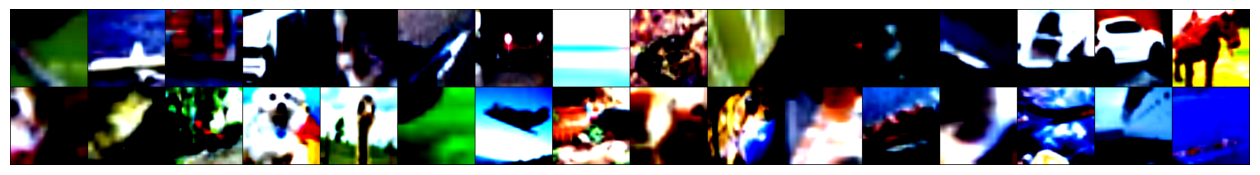

In [16]:
for images, _ in train_dataloader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))

    break

In [17]:
classes = train_dataset.dataset.classes
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Transfer Learning

Feature Extraction을 하기 위해서는 파라미터 학습을 막기 위해 `param.requires_grad = False`를, Fine tuning을 하기 위해서는 파라미터 학습을 진행하기 위해 `param.requires_grad = True`를 사용하면 됨.

아래는 Feature Extraction 예시

In [18]:
model = models.resnet18(pretrained=True)

# Feature Extraction: 마지막 fully connected layer 제외하고 모두 freeze
for param in model.parameters():
    param.requires_grad = False

/home/yunho/anaconda3/envs/ai/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yunho/anaconda3/envs/ai/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


아래는 Fine Tuning 예시

In [56]:
model = models.resnet18(pretrained=True)

# Fine tuning: feature extraction과 달리 unfreeze
for param in model.parameters():
    param.requires_grad = True

# layer4 부분만 unfreeze
for param in model.layer4.parameters():
    param.requires_grad = True

# layer4 부분의 두번째 block만 unfreeze
for param in model.layer4[1].parameters():
    param.requires_grad = True

In [19]:
num_ftrs = model.fc.in_features # 마지막 fully connected layer의 input 개수
model.fc = torch.nn.Linear(num_ftrs, len(classes)) # 마지막 fully connected layer를 class 개수만큼 출력하도록 수정

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [20]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

아래는 Feature Extraction 예시

In [21]:
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

### Train & Test

In [22]:
criterion = nn.CrossEntropyLoss() # loss function
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9) # optimizer

In [50]:
def train(model, train_loader, valid_loader, optimizer, criterion, epochs):
    # set device to use GPU if available, otherwise use CPU
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print('Device:', device)
    
    train_losses = []
    valid_losses = []
    valid_accuracies = []
    train_accuracies = []
    
    # set model to train mode
    model.train()
    
    for epoch in range(epochs):
        train_loss = 0.0
        correct = 0
        total = 0
        
        # train the model on the training set
        for i, data in enumerate(train_loader):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
            # calculate train accuracy
            maxes, indices = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (indices == labels).sum().item()
        train_accuracy = 100 * correct / total
        
        # validate the model on the validation set
        valid_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            model.eval()
            for data in valid_loader:
                inputs, labels = data[0].to(device), data[1].to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()
                maxes, indices = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (indices == labels).sum().item()
            valid_accuracy = 100 * correct / total
            print('Epoch %d/%d. Train loss: %.4f. Validation loss: %.4f. Validation accuracy: %d %%' % (epoch+1, epochs, train_loss/(i+1), valid_loss/len(valid_loader), valid_accuracy))
        
        # append train and validation losses and validation accuracy to lists
        train_losses.append(train_loss/(i+1))
        valid_losses.append(valid_loss/len(valid_loader))
        valid_accuracies.append(valid_accuracy)
        train_accuracies.append(train_accuracy)
        
        # set model back to train mode
        model.train()
    
    return train_losses, valid_losses, valid_accuracies, train_accuracies

In [51]:
def test(model, test_loader, criterion):
    # set device to use GPU if available, otherwise use CPU
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print('Device:', device)
    
    # test the model on the test set
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        model.eval()
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    test_loss /= len(test_loader)
    print('Accuracy on test set: %d %%' % test_accuracy)
    print('Average test loss: %.4f' % test_loss)
    
    return test_accuracy, test_loss

In [52]:
num_epochs = 10
train_losses, valid_losses, train_accuracies, valid_accuracies = train(model, train_dataloader, val_dataloader, optimizer, criterion, num_epochs)

Device: cuda:0
Epoch 1/10. Train loss: 1.1218. Validation loss: 1.0759. Validation accuracy: 62 %
Epoch 2/10. Train loss: 1.1306. Validation loss: 1.0807. Validation accuracy: 62 %
Epoch 3/10. Train loss: 1.1189. Validation loss: 1.0776. Validation accuracy: 62 %
Epoch 4/10. Train loss: 1.1343. Validation loss: 1.0682. Validation accuracy: 62 %
Epoch 5/10. Train loss: 1.1341. Validation loss: 1.0661. Validation accuracy: 62 %
Epoch 6/10. Train loss: 1.1300. Validation loss: 1.0768. Validation accuracy: 62 %
Epoch 7/10. Train loss: 1.1231. Validation loss: 1.0706. Validation accuracy: 62 %
Epoch 8/10. Train loss: 1.1300. Validation loss: 1.0776. Validation accuracy: 62 %
Epoch 9/10. Train loss: 1.1288. Validation loss: 1.0775. Validation accuracy: 62 %
Epoch 10/10. Train loss: 1.1310. Validation loss: 1.0738. Validation accuracy: 62 %


In [53]:
test_accuracy, test_loss = test(model, test_dataloader, criterion)

Device: cuda:0
Accuracy on test set: 61 %
Average test loss: 1.1027


In [55]:
print(train_accuracies, valid_accuracies, test_accuracy)

[62.45, 62.11, 62.08, 62.94, 62.3, 62.3, 62.85, 62.12, 62.43, 62.27] [60.905, 60.37, 60.6, 60.555, 60.6275, 60.4675, 60.84, 60.51, 60.5125, 60.455] 61.25


The main difference between the two codes is the approach used for fine-tuning the pre-trained model. In the first code example (feature extraction method), we freeze the pre-trained model's feature layers and only train the classifier layers. In the second code example (fine-tuning method), we unfreeze all the layers of the pre-trained model and train the entire model end-to-end.

When we use the feature extraction method, we essentially use the pre-trained model as a fixed feature extractor and only train the classifier layers on top of these features. This approach is useful when we have a limited amount of data, as it allows us to leverage the pre-trained model's feature extraction capabilities without overfitting to the small training set.

On the other hand, when we use the fine-tuning method, we are essentially adapting the pre-trained model to our specific task by updating all the weights of the model, including the feature extraction layers. This approach is useful when we have a larger amount of data, as it allows the model to learn more task-specific features by updating the pre-trained feature extraction layers.

In general, the choice of which method to use depends on the amount of data available and the specifics of the task at hand. If we have a small amount of data, the feature extraction method may be more suitable, while if we have a larger amount of data, the fine-tuning method may be more effective.